# Amazon_Alexa Customer Review Analysis

# About The Data

This dataset consists of a nearly 3000 Amazon customer reviews (input text), star ratings, date of review, variant and feedback of various amazon Alexa products like Alexa Echo, Echo dots, Alexa Firesticks etc.

From this data we are analyzing the reviews to be positive or negative for different amazon products(Sentiment Analysis).

Sentiment essentially relates to feelings; attitudes, emotions and opinions. Sentiment Analysis refers to the practice of applying Natural Language Processing and Text Analysis techniques to identify and extract subjective information from a piece of text. A person’s opinion or feelings are for the most part subjective and not facts. Which means to accurately analyze an individual’s opinion or mood from a piece of text can be extremely difficult. With Sentiment Analysis from a text analytics point of view, we are essentially looking to get an understanding of the attitude of a writer with respect to a topic in a piece of text and its polarity; whether it’s positive or negative.

In relation to sentiment analysis, we’re talking about insights into consumer behaviour, what our customers want, what are customers like and dislike about our products, what their buying signals are, what their decision process looks like etc.

Businesses are trying to unlock the hidden value of text in order to understand their customers’ opinions and needs and make better, more informed, business decisions. Traditionally businesses relied on surveys, workshops and focus groups to gain insight into their customers opinions and feelings, but today with modern technology we are able to harness the power of Machine Learning and Artificial Intelligence to extract meaning from text and dive into opinions of customers and see them outside of the often controlled environment of a survey.

# Step 1:

At first we would import the important libraries and the packages to move forward in coding

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Step 2:

Now we will load the data from the directory(We have downloaded the data from Kaggle.com).

To load the data we use read_csv function of pandas library.

# Loading the dataset

In [2]:
data = pd.read_csv('C:\\Users\\jaya\\Desktop\\data\\review\\amazon_alexa.tsv' , delimiter = '\t' , quoting=3)

Data is loaded successfully. As the data was '.tsv'(Tab separated value) file,for that matter we specified the delimiter as 'tab'('\t') and 'quoting=3' takes care of the 'double quotes'("") in the data.

# Viewing the data

In [4]:
data.head(5)

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1
4,5,31-Jul-18,Charcoal Fabric,Music,1


The above table gives an overview of the dataset.The column_names and the type of data it consist.

# Step 3:

Now to proceed furthermore,we have to clean the data. First we imported the re package that handle the Regular Expression in python. Then we imported Natural Language Toolkit. The NLTK package consist the built-in stopwords documentation that contain the words that are irrelevant in determining the reviews. The sub packages of NLTK, stem.porter are imported to stem(remove) the sparsity of the words that have similar meaning.

# Cleaning the dataset

In [6]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jaya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
corpus = []
for i in range(0, 3150):
    review = re.sub('[^a-zA-Z]' , ' ', data['verified_reviews'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

# Step 4:

Now we will create the bag of words model.It indicates that a bag that contains all the words that are used in the reviews frequently or the different but unique words. This will create one column for each word,that makes a table that corresponds to all the reviews in the dataset

# Creating bag of words model

We imported CountVectorizer method from the sklearn library,that Convert a collection of text documents to a matrix of token counts. Created an object of that class and set the parameter of max_features to a number that relatively gives the frequently used words.

Then we fit the updated data into 'corpus' objected we created earlier and create an array of the indepedent variables and stored them in a matrix.And differentiated the dependent variable.

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

In [9]:
cv = CountVectorizer(max_features= 2700)
X = cv.fit_transform(corpus).toarray()
y = data.iloc[: , 4].values

For classification we used different algorithms and then compared the accuracies to make better predictive model.

# Naive Bayes Algorithm:

Naive Bayes classifiers are a collection of classification algorithms based on Bayes’ Theorem. It is not a single algorithm but a family of algorithms where all of them share a common principle, i.e. every pair of features being classified is independent of each other. Naive Bayes can be extended to real-valued attributes, most commonly by assuming a Gaussian distribution.

This extension of naive Bayes is called Gaussian Naive Bayes. Other functions can be used to estimate the distribution of the data, but the Gaussian (or Normal distribution) is the easiest to work with because you only need to estimate the mean and the standard deviation from your training data.

# Random Forest Algorithm:

Random Forest is a flexible, easy to use machine learning algorithm that produces, even without hyper-parameter tuning, a great result most of the time. It is also one of the most used algorithms, because it’s simplicity and the fact that it can be used for both classification and regression tasks. In general, the more trees in the forest the more robust the forest looks like. In the same way in the random forest classifier, the higher the number of trees in the forest gives the high accuracy results.

# Logistic Regression Algorithm:

Logistic regression is the appropriate regression analysis to conduct when the dependent variable is dichotomous (binary). Like all regression analyses, the logistic regression is a predictive analysis. Logistic regression is used to describe data and to explain the relationship between one dependent binary variable and one or more nominal, ordinal, interval or ratio-level independent variables.

# Step 5:

# Applying Naive Bayes method

# Splitting the dataset into the Training set and Test set

First we split the dataset into two parts.Test data and Train Data.We would build the model by training it with train data and then test the accuracy of the model with the test data and our predicted values.

We have taken 25% of the entire dataset as our test data.

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Fitting Naive Bayes to the Training set

In [12]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

We have successfully fitted our train model into Gaussian Naive Bayes model.

# Predicting the Test set results

The predict function gives us the predicted value of the dependent variable

In [13]:
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix

Now we make the confusion matrix to see the performance of the model on test data. Then plot the confusion matrix and print the accuracy score and classification report to analyse the performance of the model.

Confusion matrix:
[[ 20  51]
 [  5 712]]


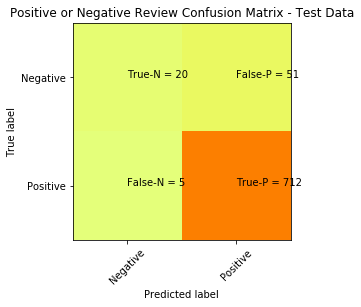

Accuracy: 0.9289340101522843
Classification Report:               precision    recall  f1-score   support

           0       0.80      0.28      0.42        71
           1       0.93      0.99      0.96       717

   micro avg       0.93      0.93      0.93       788
   macro avg       0.87      0.64      0.69       788
weighted avg       0.92      0.93      0.91       788



In [32]:
from sklearn.metrics import confusion_matrix , accuracy_score , classification_report
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n%s" % cm)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Positive or Negative Review Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['True-N','False-P'], ['False-N', 'True-P']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()
print('Accuracy:',accuracy_score(y_test,y_pred))
print('Classification Report:',classification_report(y_test,y_pred))

This algorithm predicted 92% accurate model.That is quite good model to proceed. So we applied another algorithm,Random Forest Algorithm.

Cross Validation is used to assess the predictive performance of the models and and to judge how they perform outside the sample to a new data set also known as test data The motivation to use cross validation techniques is that when we fit a model, we are fitting it to a training dataset. Without cross validation we only have information on how does our model perform to our in-sample data. Ideally we would like to see how does the model perform when we have a new data in terms of accuracy of its predictions. In science, theories are judged by its predictive performance.
We applied Kfold Cross Validation method here.

# Cross validation

# Applying k-Fold Cross Validation

Here we applied K-Fold Cross Validation method of sklearn package.We split the sample into 10 folds and taken the mean accuracy_score to evaluate the model's precision.

In [15]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
accuracies.mean()
accuracies.std()

print("Accuracy is: " , accuracies)
print("Accuracy of Naive Bayes Algorithm is: " , accuracies.mean())

Accuracy is:  [0.52320675 0.60337553 0.59915612 0.60337553 0.56540084 0.56962025
 0.57446809 0.59148936 0.62978723 0.59148936]
Accuracy of Naive Bayes Algorithm is:  0.5851369063650238


After Cross Validating the accuracy is 58%.

# Step 6:

# Applying Random Forest Algorithm

# Splitting the dataset into the Training set and Test set

First we split the dataset into two parts.Test data and Train Data.We would build the model by training it with train data and then test the accuracy of the model with the test data and our predicted values.

We have taken 25% of the entire dataset as our test data.

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Fitting Random Forest Classification to the Training set

In [17]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

# Predicting the Test set results

We have successfully fitted our train data into RandomForest classifier. The predict function of the classifier gives us the predicted value.

In [18]:
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix

Now we make the confusion matrix to see the performance of the model on test data. Then plot the confusion matrix and print the accuracy score and classification report to analyse the performance of the model.

In [19]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

Confusion matrix:
[[ 21  50]
 [  4 713]]


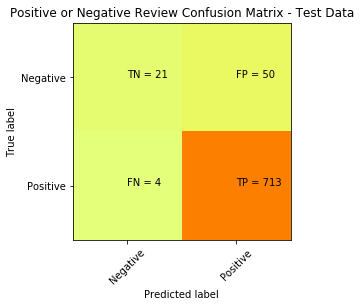

Accuracy: 0.9314720812182741
Classification Report:               precision    recall  f1-score   support

           0       0.84      0.30      0.44        71
           1       0.93      0.99      0.96       717

   micro avg       0.93      0.93      0.93       788
   macro avg       0.89      0.65      0.70       788
weighted avg       0.93      0.93      0.92       788



In [20]:
print("Confusion matrix:\n%s" % cm)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Positive or Negative Review Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()
print('Accuracy:',accuracy_score(y_test,y_pred))
print('Classification Report:',classification_report(y_test,y_pred))


This algorithm predicted 93% accurate model.

Cross Validation is used to assess the predictive performance of the models and and to judge how they perform outside the sample to a new data set also known as test data The motivation to use cross validation techniques is that when we fit a model, we are fitting it to a training dataset. Without cross validation we only have information on how does our model perform to our in-sample data. Ideally we would like to see how does the model perform when we have a new data in terms of accuracy of its predictions. In science, theories are judged by its predictive performance. We applied Kfold Cross Validation method here.

# Cross validation

# Applying k-Fold Cross Validation

Here we applied K-Fold Cross Validation method of sklearn package.We split the sample into 10 folds and taken the mean accuracy_score to evaluate the model's precision.

In [21]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
accuracies.mean()
accuracies.std()

print("Accuracy is: " , accuracies)
print("Accuracy of Random Forest Algorithm is: " , accuracies.mean())

Accuracy is:  [0.93670886 0.92405063 0.93248945 0.94936709 0.94514768 0.93670886
 0.93191489 0.94042553 0.94042553 0.94468085]
Accuracy of Random Forest Algorithm is:  0.9381919382350301



Now after cross validating the accuracy score is still 93%.

So we can conclude that in this dataset RandomForest Algorithm outperforms the NaiveBayes Algorithm.

# Step 7:

# Applying Logistic Regression Algorithm

# Splitting the dataset into the Training set and Test set

First we split the dataset into two parts.Test data and Train Data.We would build the model by training it with train data and then test the accuracy of the model with the test data and our predicted values.

We have taken 25% of the entire dataset as our test data.

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Fitting Logistic Regression to the Training set

In [24]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

C:\Users\jaya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

# Predicting the Test set results

We have successfully fitted our train data into the LogisticRegression classifier. The predict function of the classifier gives us the predicted value.

In [25]:
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix

Now we make the confusion matrix to see the performance of the model on test data. Then plot the confusion matrix and print the accuracy score and classification report to analyse the performance of the model.

In [26]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

Confusion matrix:
[[ 20  51]
 [  5 712]]


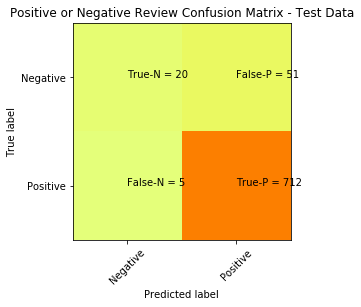

Accuracy: 0.9289340101522843
Classification Report:               precision    recall  f1-score   support

           0       0.80      0.28      0.42        71
           1       0.93      0.99      0.96       717

   micro avg       0.93      0.93      0.93       788
   macro avg       0.87      0.64      0.69       788
weighted avg       0.92      0.93      0.91       788



In [27]:
print("Confusion matrix:\n%s" % cm)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Positive or Negative Review Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['True-N','False-P'], ['False-N', 'True-P']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()
print('Accuracy:',accuracy_score(y_test,y_pred))
print('Classification Report:',classification_report(y_test,y_pred))

This algorithm predicted nearly 93% accurate model.

Cross Validation is used to assess the predictive performance of the models and and to judge how they perform outside the sample to a new data set also known as test data The motivation to use cross validation techniques is that when we fit a model, we are fitting it to a training dataset. Without cross validation we only have information on how does our model perform to our in-sample data. Ideally we would like to see how does the model perform when we have a new data in terms of accuracy of its predictions. In science, theories are judged by its predictive performance. We applied Kfold Cross Validation method here.

# Cross validation

# Applying k-Fold Cross Validation

Here we applied K-Fold Cross Validation method of sklearn package.We split the sample into 10 folds and taken the mean accuracy_score to evaluate the model's precision.

In [29]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
accuracies.mean()

print("Accuracy is: " , accuracies)
print("Accuracy of Logistic Regression Algorithm is: " , accuracies.mean())

C:\Users\jaya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jaya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jaya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jaya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jaya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

Accuracy is:  [0.93248945 0.93248945 0.93670886 0.94514768 0.92827004 0.91983122
 0.94893617 0.93617021 0.93191489 0.94893617]
Accuracy of Logistic Regression Algorithm is:  0.9360894155669272


C:\Users\jaya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jaya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


After cross validating the accuracy score is still 93%.

So, we can observe that the RandomForest Algorithm and Logistic Regression algorithm gives nearly same accuracy score in perdiction. We can conclude that our model would be nearly 93% accurate in predicting whether the review is positive or negative for amazon_alexa products.